<a href="https://colab.research.google.com/github/devsharmapolist/DATA-SCIENCE-COURSE-PW/blob/main/Linear_Regression_Assignment_Practical_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.




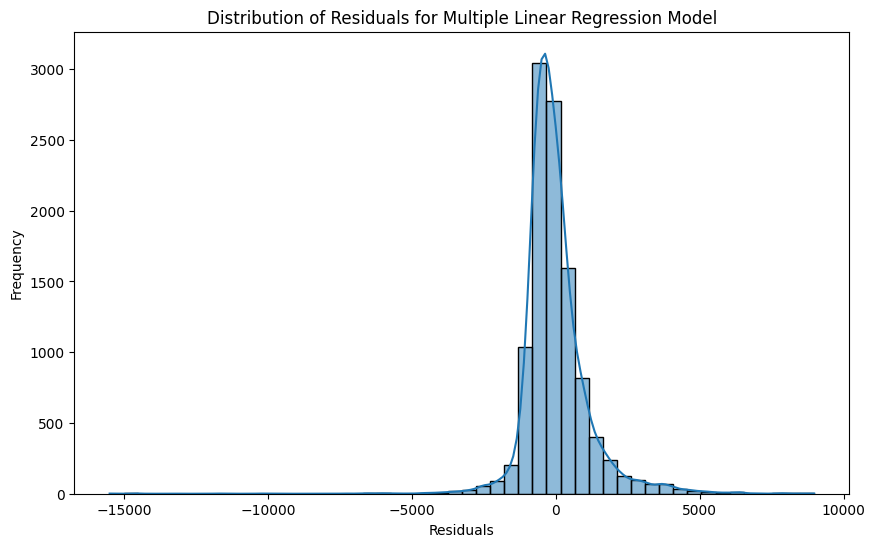

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select features and target variable
features = ["carat", "depth", "table", "x", "y", "z", "cut", "color", "clarity"]
target = "price"

X = diamonds[features]
y = diamonds[target]

# Handle categorical variables using one-hot encoding
categorical_features = ["cut", "color", "clarity"]
numeric_features = ["carat", "depth", "table", "x", "y", "z"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and regression model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals for Multiple Linear Regression Model")
plt.show()


2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select features and target variable
features = ["carat", "depth", "table", "x", "y", "z", "cut", "color", "clarity"]
target = "price"

X = diamonds[features]
y = diamonds[target]

# Handle categorical variables using one-hot encoding
categorical_features = ["cut", "color", "clarity"]
numeric_features = ["carat", "depth", "table", "x", "y", "z"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and regression model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print error metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 1288705.48
Mean Absolute Error (MAE): 737.15
Root Mean Squared Error (RMSE): 1135.21


3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

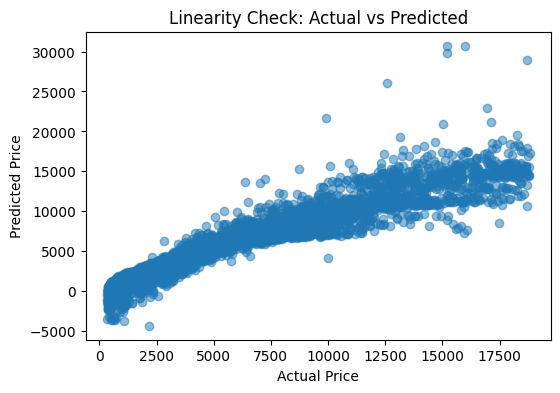

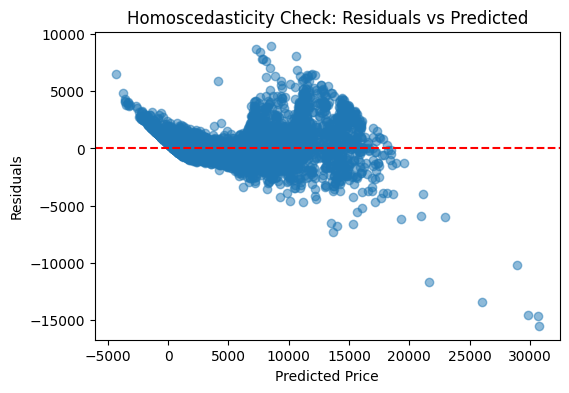

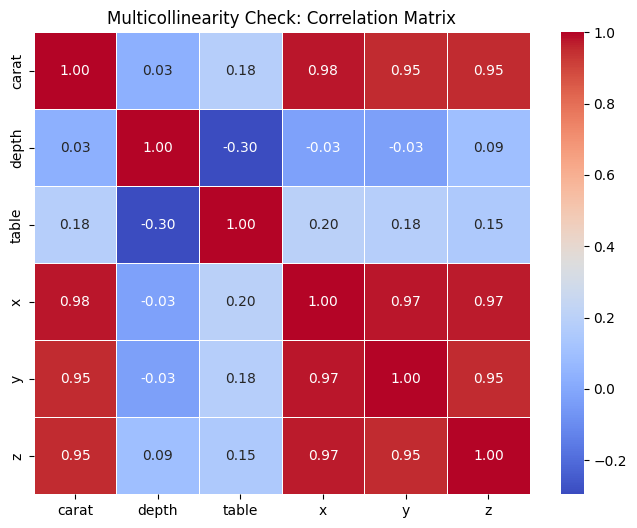

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select features and target variable
features = ["carat", "depth", "table", "x", "y", "z", "cut", "color", "clarity"]
target = "price"

X = diamonds[features]
y = diamonds[target]

# Handle categorical variables using one-hot encoding
categorical_features = ["cut", "color", "clarity"]
numeric_features = ["carat", "depth", "table", "x", "y", "z"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Create a pipeline with preprocessing and regression model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# 1. Check linearity using scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linearity Check: Actual vs Predicted")
plt.show()

# 2. Check homoscedasticity using residuals plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.show()

# 3. Check multicollinearity using correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = diamonds[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Multicollinearity Check: Correlation Matrix")
plt.show()


4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models

Linear Regression: RMSE = 1135.21
Ridge Regression: RMSE = 1135.19
Lasso Regression: RMSE = 1135.14
Random Forest: RMSE = 639.53


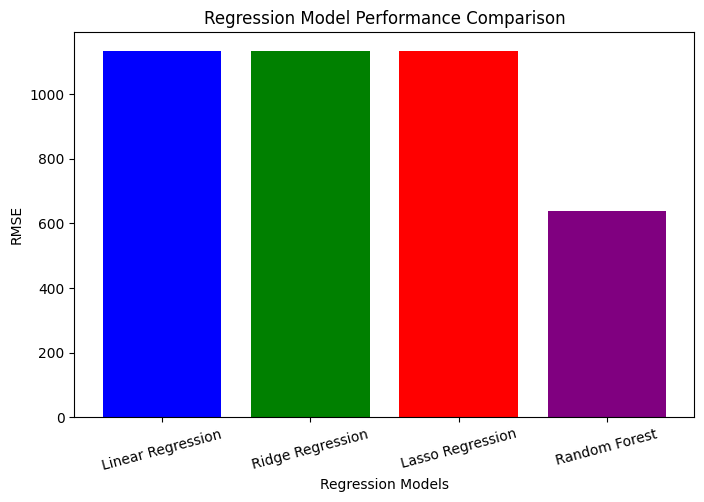

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select features and target variable
features = ["carat", "depth", "table", "x", "y", "z", "cut", "color", "clarity"]
target = "price"

X = diamonds[features]
y = diamonds[target]

# Handle categorical variables using one-hot encoding
categorical_features = ["cut", "color", "clarity"]
numeric_features = ["carat", "depth", "table", "x", "y", "z"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Define regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = rmse

# Display results
for model, rmse in results.items():
    print(f"{model}: RMSE = {rmse:.2f}")

# Plot performance comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Regression Models")
plt.ylabel("RMSE")
plt.title("Regression Model Performance Comparison")
plt.xticks(rotation=15)
plt.show()


5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

Intercept: -2261.91
Coefficient: 7768.91
R-squared Score: 0.8489


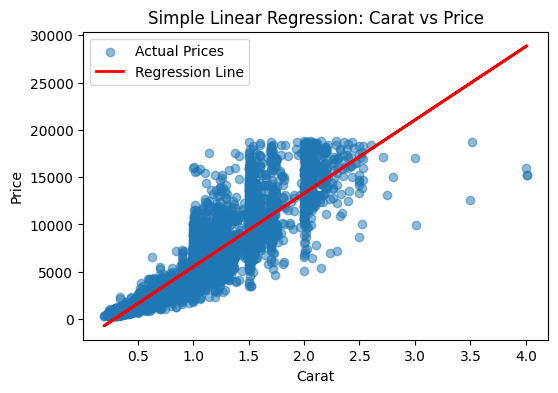

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select a single feature and target variable
X = diamonds[["carat"]]  # Using carat as the independent variable
y = diamonds["price"]  # Price as the dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient: {coefficient:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Plot regression line
plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, alpha=0.5, label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Carat vs Price")
plt.legend()
plt.show()

6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

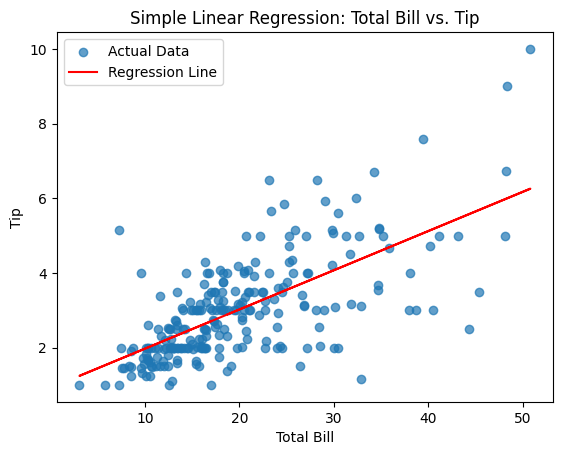

Intercept: 0.9202696135546731
Coefficient: 0.10502451738435337
R-squared Score: 0.45661658635167657


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the 'tips' dataset
df = sns.load_dataset('tips')

# Define independent (X) and dependent (y) variables
X = df[['total_bill']]  # Predictor variable
y = df['tip']  # Response variable

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the data and regression line
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression: Total Bill vs. Tip')
plt.legend()
plt.show()

# Print model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"R-squared Score: {model.score(X, y)}")


7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

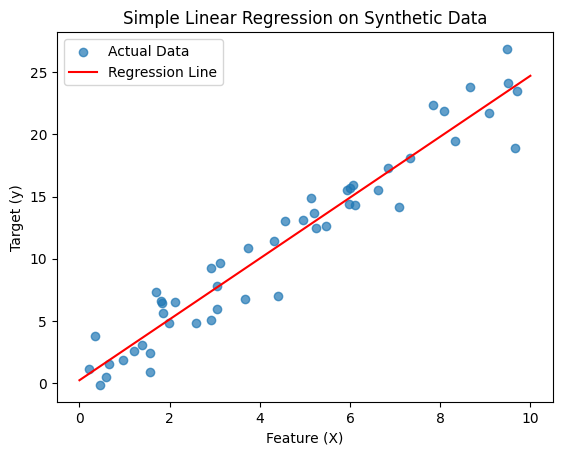

Intercept: 0.24734202315403486
Coefficient: 2.4447378627984215
R-squared Score: 0.9073954670069457


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # 50 random values for X (feature)
y = 2.5 * X + np.random.randn(50, 1) * 2  # Linear relationship with some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
X_new = np.linspace(0, 10, 100).reshape(-1, 1)  # Generate new data points
y_pred = model.predict(X_new)

# Plot the data points and regression line
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Simple Linear Regression on Synthetic Data')
plt.legend()
plt.show()

# Print model parameters
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")
print(f"R-squared Score: {model.score(X_test, y_test)}")


8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [ ]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature
y = 2.5 * X + np.random.randn(50, 1) * 2  # Target variable with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'linear_regression_model.pkl'")


Model has been pickled and saved as 'linear_regression_model.pkl'


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

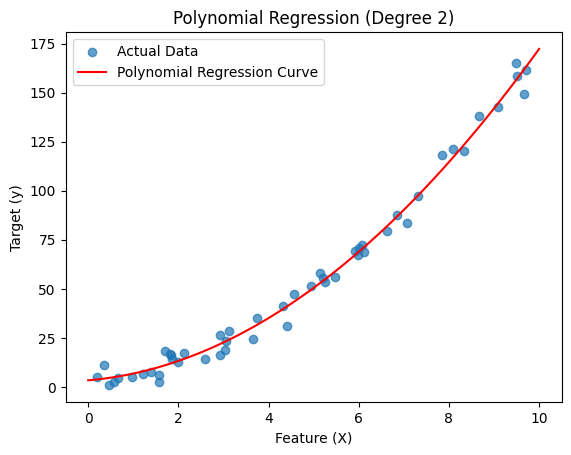

Intercept: 3.377751988783295
Coefficients: [0.         1.95509174 1.49315041]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature
y = 3 + 2 * X + 1.5 * X**2 + np.random.randn(50, 1) * 5  # Quadratic relationship with noise

# Transform features for polynomial regression (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Train a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate new data for plotting the regression curve
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_pred = model.predict(X_new_poly)

# Plot the data points and regression curve
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X_new, y_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

# Print model coefficients
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficients: {model.coef_[0]}")


10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # 50 random values for X
y = 3 + 2.5 * X + np.random.randn(50, 1) * 2  # Linear relationship with some noise

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")


Intercept: 3.1933785489377744
Coefficient: 2.455313200770621


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

Degree 1 - R-squared Score: 0.9399
Degree 2 - R-squared Score: 0.9913
Degree 3 - R-squared Score: 0.9914
Degree 4 - R-squared Score: 0.9915
Degree 5 - R-squared Score: 0.9917


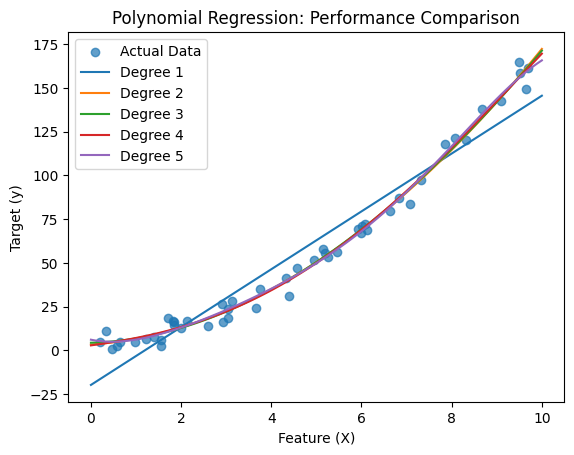

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature
y = 3 + 2 * X + 1.5 * X**2 + np.random.randn(50, 1) * 5  # Quadratic relationship with noise

# Degrees to test
degrees = [1, 2, 3, 4, 5]

# Plot data points
plt.scatter(X, y, label="Actual Data", alpha=0.7)

# Fit polynomial regression models for different degrees and compare performance
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predictions for plotting
    X_new = np.linspace(0, 10, 100).reshape(-1, 1)
    X_new_poly = poly_features.transform(X_new)
    y_pred = model.predict(X_new_poly)

    # Plot regression curves
    plt.plot(X_new, y_pred, label=f"Degree {degree}")

    # Compute and print R-squared score
    y_train_pred = model.predict(X_poly)
    r2 = r2_score(y, y_train_pred)
    print(f"Degree {degree} - R-squared Score: {r2:.4f}")

# Finalize plot
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression: Performance Comparison")
plt.legend()
plt.show()


12. Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data with two features
np.random.seed(42)
X1 = 10 * np.random.rand(50, 1)  # First feature
X2 = 5 * np.random.rand(50, 1)   # Second feature
y = 3 + 2.5 * X1 + 1.2 * X2 + np.random.randn(50, 1) * 2  # Linear relationship with noise

# Combine features into a single matrix
X = np.hstack((X1, X2))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and compute R-squared score
r2_score = model.score(X_test, y_test)

# Print model parameters
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficients: {model.coef_[0]}")
print(f"R-squared Score: {r2_score:.4f}")


Intercept: 4.453836824532054
Coefficients: [2.19060117 1.19124335]
R-squared Score: 0.9036


13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

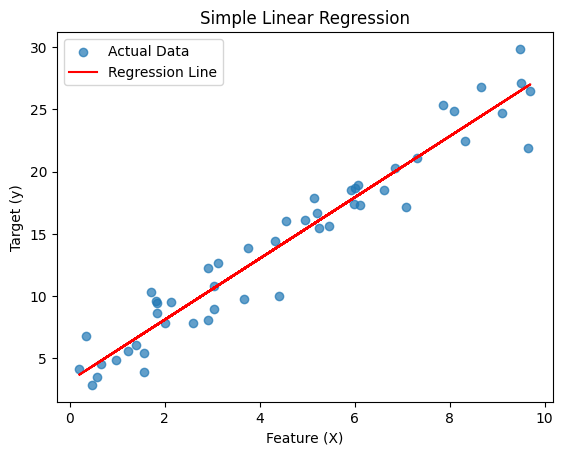

Intercept: 3.1933785489377744
Coefficient: 2.455313200770621


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature
y = 3 + 2.5 * X + np.random.randn(50, 1) * 2  # Linear relationship with noise

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Print model parameters
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")


14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate synthetic dataset with multiple features
np.random.seed(42)
X1 = 10 * np.random.rand(100, 1)  # Feature 1
X2 = 2 * X1 + np.random.randn(100, 1) * 2  # Feature 2 (highly correlated with X1)
X3 = 5 * np.random.rand(100, 1)  # Feature 3 (less correlated)
y = 3 + 2.5 * X1 + 1.2 * X2 + 0.8 * X3 + np.random.randn(100, 1) * 2  # Target variable

# Combine features into a DataFrame
df = pd.DataFrame(np.hstack((X1, X2, X3)), columns=['X1', 'X2', 'X3'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Print VIF results
print(vif_data)


  Feature        VIF
0      X1  37.701278
1      X2  38.542593
2      X3   2.238342


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

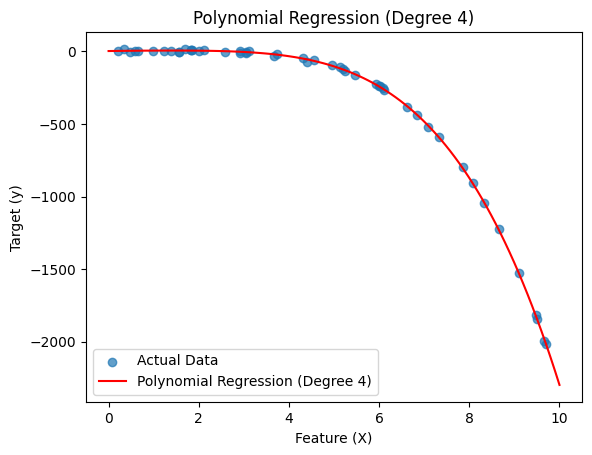

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data with a degree-4 polynomial relationship
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature values
y = 3 + 2.5 * X - 1.2 * X**2 + 0.8 * X**3 - 0.3 * X**4 + np.random.randn(50, 1) * 8  # Polynomial relationship with noise

# Transform features for polynomial regression (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_pred = model.predict(X_new_poly)

# Plot actual data points and the fitted polynomial curve
plt.scatter(X, y, label="Actual Data", alpha=0.7)
plt.plot(X_new, y_pred, color="red", label="Polynomial Regression (Degree 4)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.show()


16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [12]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with multiple features
np.random.seed(42)
X1 = 10 * np.random.rand(100, 1)  # Feature 1
X2 = 5 * np.random.rand(100, 1)   # Feature 2
X3 = 8 * np.random.rand(100, 1)   # Feature 3
y = 3 + 2.5 * X1 + 1.2 * X2 + 0.8 * X3 + np.random.randn(100, 1) * 2  # Target variable with noise

# Combine features into a single dataset
X = np.hstack((X1, X2, X3))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and linear regression
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("regressor", LinearRegression())  # Apply multiple linear regression
])

# Train the model
pipeline.fit(X_train, y_train)

# Compute R-squared score
r2_score = pipeline.score(X_test, y_test)

# Print R-squared score
print(f"R-squared Score: {r2_score:.4f}")


R-squared Score: 0.9050


17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve

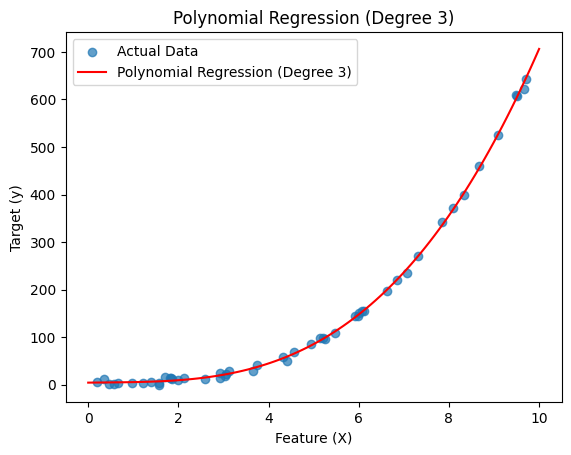

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data with a cubic (degree 3) relationship
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature values
y = 3 + 2.5 * X - 1.2 * X**2 + 0.8 * X**3 + np.random.randn(50, 1) * 5  # Cubic relationship with noise

# Transform features for polynomial regression (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions for visualization
X_new = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth curve for plotting
X_new_poly = poly_features.transform(X_new)
y_pred = model.predict(X_new_poly)

# Plot actual data points and the fitted polynomial curve
plt.scatter(X, y, label="Actual Data", alpha=0.7)
plt.plot(X_new, y_pred, color="red", label="Polynomial Regression (Degree 3)")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression (Degree 3)")
plt.legend()
plt.show()


18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 5 features
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
true_coefficients = np.array([2.5, -1.2, 3.8, 0.5, -2.0])  # True coefficients
y = 5 + X.dot(true_coefficients) + np.random.randn(100) * 3  # Target variable with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Compute R-squared score
r2_score = model.score(X_test, y_test)

# Print model coefficients and R-squared score
print("R-squared Score:", round(r2_score, 4))
print("Intercept:", round(model.intercept_, 4))
print("Coefficients:", np.round(model.coef_, 4))


R-squared Score: 0.9373
Intercept: 5.438
Coefficients: [ 2.3959 -1.2702  3.9944  0.5437 -2.1337]


19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

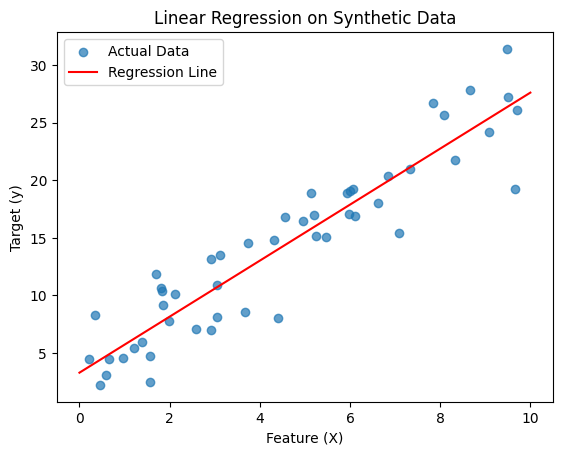

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for linear regression
np.random.seed(42)
X = 10 * np.random.rand(50, 1)  # Feature values
y = 3 + 2.5 * X + np.random.randn(50, 1) * 3  # Linear relationship with noise

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
X_new = np.linspace(0, 10, 100).reshape(-1, 1)  # Smooth curve for plotting
y_pred = model.predict(X_new)

# Plot actual data points and the regression line
plt.scatter(X, y, label="Actual Data", alpha=0.7)
plt.plot(X_new, y_pred, color="red", label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.show()


20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 3 features
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 100 samples, 3 features
true_coefficients = np.array([2.5, -1.2, 3.8])  # True coefficients for each feature
y = 5 + X.dot(true_coefficients) + np.random.randn(100) * 2  # Target variable with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Compute R-squared score
r2_score = model.score(X_test, y_test)

# Print model coefficients and R-squared score
print("R-squared Score:", round(r2_score, 4))
print("Intercept:", round(model.intercept_, 4))
print("Coefficients:", np.round(model.coef_, 4))


R-squared Score: 0.9526
Intercept: 4.83
Coefficients: [ 2.5212 -1.2151  3.9372]


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [17]:
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 5 + 2.5 * X + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(model, "linear_regression_model.joblib")
print("Model saved successfully!")

# Load the model back
loaded_model = joblib.load("linear_regression_model.joblib")
print("Model loaded successfully!")

# Test the loaded model by predicting on test data
r2_score = loaded_model.score(X_test, y_test)
print("R-squared Score of Loaded Model:", round(r2_score, 4))


Model saved successfully!
Model loaded successfully!
R-squared Score of Loaded Model: 0.9546


22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset("tips")

# Select relevant features (including categorical features)
features = ["total_bill", "sex", "smoker", "day", "time", "size"]
target = "tip"

# Create the feature matrix X and target variable y
X = tips[features]
y = tips[target]

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X, drop_first=True)  # Converts categorical variables to numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print model coefficients and R-squared score
print("R-squared Score:", round(r2, 4))
print("Intercept:", round(model.intercept_, 4))
print("Coefficients:", pd.Series(model.coef_, index=X.columns))


R-squared Score: 0.4373
Intercept: 0.4791
Coefficients: total_bill     0.094700
size           0.233484
sex_Female    -0.028819
smoker_No      0.192353
day_Fri        0.179721
day_Sat       -0.006064
day_Sun        0.128928
time_Dinner   -0.094957
dtype: float64


23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
true_coefficients = np.array([3.2, -1.5, 2.7, 0, 4.5])  # Simulated true coefficients
y = 5 + X.dot(true_coefficients) + np.random.randn(100) * 3  # Target variable with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)

# Train a Ridge Regression model (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # Alpha controls regularization strength
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Print results
print("Linear Regression Results:")
print("R-squared Score:", round(lr_r2, 4))
print("Coefficients:", np.round(lr_model.coef_, 4))

print("\nRidge Regression Results:")
print("R-squared Score:", round(ridge_r2, 4))
print("Coefficients:", np.round(ridge_model.coef_, 4))


Linear Regression Results:
R-squared Score: 0.9687
Coefficients: [ 3.0959 -1.5702  2.8944  0.0437  4.3663]

Ridge Regression Results:
R-squared Score: 0.9686
Coefficients: [ 3.0903 -1.5687  2.8891  0.0448  4.3602]


24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation and compute R-squared scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the results
print("Cross-Validation R-squared Scores:", np.round(cv_scores, 4))
print("Mean R-squared Score:", round(np.mean(cv_scores), 4))
print("Standard Deviation of Scores:", round(np.std(cv_scores), 4))


Cross-Validation R-squared Scores: [0.9934 0.99   0.9977 0.9913 0.9933]
Mean R-squared Score: 0.9931
Standard Deviation of Scores: 0.0026


25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

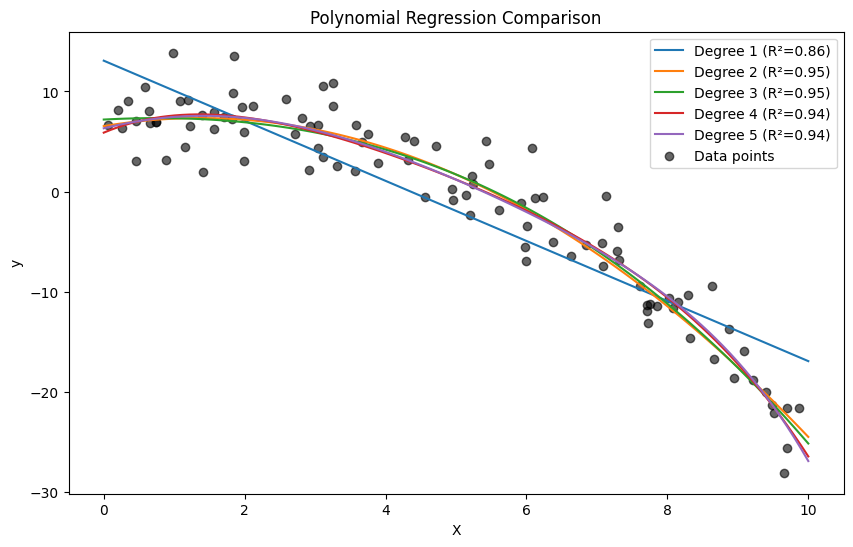

R-squared Scores for Different Polynomial Degrees:
Degree 1: R² = 0.858
Degree 2: R² = 0.9456
Degree 3: R² = 0.9451
Degree 4: R² = 0.941
Degree 5: R² = 0.9413


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 5 + 2 * X - 0.5 * X**2 + np.random.randn(100, 1) * 3  # Quadratic relationship with noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees of polynomial to compare
degrees = [1, 2, 3, 4, 5]

# Store R-squared scores
r2_scores = {}

plt.figure(figsize=(10, 6))

# Loop through different polynomial degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and calculate R-squared score
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    r2_scores[degree] = round(r2, 4)

    # Plot regression curves
    X_range = np.linspace(0, 10, 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    plt.plot(X_range, y_range_pred, label=f'Degree {degree} (R²={r2:.2f})')

# Scatter plot of actual data points
plt.scatter(X, y, color='black', label="Data points", alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression Comparison")
plt.legend()
plt.show()

# Print R-squared scores for different polynomial degrees
print("R-squared Scores for Different Polynomial Degrees:")
for degree, score in r2_scores.items():
    print(f"Degree {degree}: R² = {score}")
